# Shelxl

In [322]:
from utils import*#;imp.reload(dsp)
import io
from subprocess import check_output
from EDutils import utilities as ut 
from scattering import structure_factor as sF  ;imp.reload(sF)
from blochwave import bloch_pp as bl ;imp.reload(bl)
import misc_utils as misc_ut;imp.reload(misc_ut)
cif_file='resources/LTA.cif'
shelxl='/home/lii26466/shelx/shelxl'
figs = (18,5)
misc_ut.get_commit(ut.__file__)

%matplotlib inline

branch=refactor, commit=f9e56d3b3fc9bf2fad3a3bca77b7257d1bde24a5 


## Initial run
### Structure factors from gemmi
We use `get_small_structure_factor` from the gemmi python interface. 
We then compare with calling the gemmi program from the command line. 
By default the ADP are taken into account.

In [260]:
aniso=False
df = sF.get_small_structure_factor(cif_file,Nmax=17,aniso=aniso)
gemmi_prog='/home/lii26466/Documents/git/ccp4/src/.env/bin/gemmi'
df_G = sF.get_gemmi_structure_factor(cif_file,gemmi_prog,keV=200,dmin=0.5,aniso=aniso)
df_merge = df_G[['F','hkl']].merge(df[['F','hkl']],on='hkl',suffixes=('_sm','_gemmi'))
df_merge.set_index('hkl',inplace=True)
print(df_merge[['F_sm','F_gemmi']])

                             F_sm              F_gemmi
hkl                                                   
(0, 1, 0)    -52.342599+0.000000j -52.342599-0.000000j
(0, 1, 1)    -38.381116+0.000000j -38.381116+0.000000j
(0, 2, 0)     12.339191+0.000000j  12.339191-0.000000j
(0, 2, 1)     19.595306+0.000000j  19.595306-0.000000j
(0, 2, 2)    -36.362506+0.000000j -36.362506+0.000000j
...                           ...                  ...
(12, 16, 12)  -1.135812+0.000000j  -1.135812-0.000000j
(13, 13, 13)   1.492509+0.000000j   1.492509+0.000000j
(13, 14, 13)  -1.289640+0.000000j  -1.289640-0.000000j
(13, 14, 14)   1.087918+0.000000j   1.087918+0.000000j
(13, 15, 13)  -0.295246+0.000000j  -0.295246-0.000000j

[1063 rows x 2 columns]


In [261]:
aniso=True
df = sF.get_small_structure_factor(cif_file,Nmax=17,aniso=aniso)
gemmi_prog='/home/lii26466/Documents/git/ccp4/src/.env/bin/gemmi'
df_G = sF.get_gemmi_structure_factor(cif_file,gemmi_prog,keV=200,dmin=0.5,aniso=aniso)
df_merge = df_G[['F','hkl']].merge(df[['F','hkl']],on='hkl',suffixes=('_sm','_gemmi'))
df_merge.set_index('hkl',inplace=True)
print(df_merge[['F_sm','F_gemmi']])

                             F_sm              F_gemmi
hkl                                                   
(0, 1, 0)    -52.311014+0.000000j -52.311014+0.000000j
(0, 1, 1)    -38.324271+0.000000j -38.324271+0.000000j
(0, 2, 0)     12.215390+0.000000j  12.215390-0.000000j
(0, 2, 1)     19.490633+0.000000j  19.490633-0.000000j
(0, 2, 2)    -36.146862+0.000000j -36.146862+0.000000j
...                           ...                  ...
(12, 16, 12)  -1.472998+0.000000j  -1.472998+0.000000j
(13, 13, 13)   1.788385+0.000000j   1.788385-0.000000j
(13, 14, 13)  -1.395749+0.000000j  -1.395749-0.000000j
(13, 14, 14)   1.187071+0.000000j   1.187071+0.000000j
(13, 15, 13)  -0.394700+0.000000j  -0.394700-0.000000j

[1063 rows x 2 columns]


In [288]:
Nmax=5
df0 = sF.get_small_structure_factor(cif_file,Nmax=Nmax,aniso=True)
df1 = sF.get_small_structure_factor(cif_file,Nmax=Nmax,aniso=False)
df2 = sF.get_small_structure_factor('resources/LTA_no_iso.cif',Nmax=Nmax,aniso=False)
df3 = sF.get_structure_factor(cif_file,hklMax=Nmax)
df = pd.merge(df0,df1,on='hkl',suffixes=('_adp','_iso'),how='inner')
df = pd.merge(df,df2 ,on='hkl',suffixes=('','_nodp'),how='inner')
df = pd.merge(df,df3 ,on='hkl',suffixes=('','_bloch'),how='inner')
df.index=df.hkl
print(df.sort_values('I',ascending=False)[['I_adp','I_iso','I','I_bloch']].to_string())

                     I_adp         I_iso             I       I_bloch
hkl                                                                 
(0, 0, 0)     55246.813772  55246.813772  55246.813772  55248.755934
(0, 0, 1)      2736.442167   2739.747690   2750.724811   2747.020760
(0, 0, -1)     2736.442167   2739.747690   2750.724811   2747.020760
(-1, 0, 0)     2736.442167   2739.747690   2750.724811   2747.020760
(1, 0, 0)      2736.442167   2739.747690   2750.724811   2747.020760
(0, -1, 0)     2736.442167   2739.747690   2750.724811   2747.020760
(0, 1, 0)      2736.442167   2739.747690   2750.724811   2747.020760
(-1, -1, -1)   2531.261889   2534.476171   2564.950479   2559.614666
(-1, -1, 1)    2531.261889   2534.476171   2564.950479   2559.614666
(-1, 1, -1)    2531.261889   2534.476171   2564.950479   2559.614666
(1, 1, -1)     2531.261889   2534.476171   2564.950479   2559.614666
(-1, 1, 1)     2531.261889   2534.476171   2564.950479   2559.614666
(1, -1, 1)     2531.261889   2534.

### Exporting and running shelxl 

In [305]:
df0 = sF.get_small_structure_factor('resources/LTA.cif',Nmax=17,aniso=True)
df0['sig']=0.01
ut.to_shelx(df0[['h','k','l','I','sig']],file='dat/shelx/shelx_Fkin.hkl')
out  = check_output('cp resources/shelx/shelxl_lta_sim.ins dat/shelx/shelx_Fkin.ins ',shell=True).decode()
out  = check_output('cd dat/shelx/; %s shelx_Fkin ' %shelxl,shell=True).decode()
Rfac = eval(check_output('grep R1 dat/shelx/shelx_Fkin.lst | tail -n1 | cut -d "=" -f2 ',shell=True).decode().strip().split(' ')[0])    
print('Rfactor = %.2f%%' %(Rfac*100))

file saved : 
 dat/shelx/shelx_Fkin.hkl 
Rfactor = 0.71%


## Running simulations

In [308]:
name = 'lta_urand_Nmax12_Smax005'
u  = np.array([0.66865363, 0.29164837, 0.6521759 ])
u  = u/np.linalg.norm(u)
uvw=ut.get_uvw(u,osc=4,npts=601)

Sargs=dict(cif_file='resources/LTA.cif',Smax=0.005,keV=200,Nmax=12,solve=True,aniso=True,v=0)
rock = bl.Bloch_cont(path='dat/LTA/rocks/%s' %name,uvw=uvw,tag='',params=[],vals=[],
                     Sargs=Sargs,
                     frames=np.arange(len(uvw)) )

creating directory: dat/LTA/rocks/lta_urand_Nmax12_Smax005

...Structure factors...
structure factors updated.
 ...assembling 96x96 matrix (structure factor shape : (49, 49, 49) ...             
...diagonalization...
object saved
dat/LTA/rocks/lta_urand_Nmax12_Smax005/u-frame__000.pkl
 ...assembling 96x96 matrix (structure factor shape : (49, 49, 49) ...             
...diagonalization...
object saved
dat/LTA/rocks/lta_urand_Nmax12_Smax005/u-frame__001.pkl
 ...assembling 94x94 matrix (structure factor shape : (49, 49, 49) ...             
...diagonalization...
object saved
dat/LTA/rocks/lta_urand_Nmax12_Smax005/u-frame__002.pkl
 ...assembling 94x94 matrix (structure factor shape : (49, 49, 49) ...             
...diagonalization...
object saved
dat/LTA/rocks/lta_urand_Nmax12_Smax005/u-frame__003.pkl
 ...assembling 93x93 matrix (structure factor shape : (49, 49, 49) ...             
...diagonalization...
object saved
dat/LTA/rocks/lta_urand_Nmax12_Smax005/u-frame__004.pkl
 ...assembling

In [310]:
rock.do('_set_beams_vs_thickness', verbose=False,thicks=np.arange(10,5001,10),v=0)
hklf=rock.get_full_refl(Swm=0.0045)
rock._integrate_rocking(refl=hklf)

object saved
dat/LTA/rocks/lta_urand_Nmax12_Smax005/rock_.pkl
rock.Iz updated


## Rfactors 

In [312]:
rock_file='dat/LTA/rocks/lta_urand_Nmax12_Smax005/rock_.pkl'
rock=ut.load_pkl(rock_file)
hklf=rock.get_full_refl(Swm=0.0045)

thicks=rock.load(0).z[::10]
Rfactors=np.zeros(thicks.shape)
Rfactors_shelxl=np.zeros(thicks.shape)
df = pd.DataFrame(index=hklf)
df[['h','k','l']] = np.array([eval(h) for h in hklf])
df['sig']= 0.01
df['I']  = 0
df.loc[str((0,0,0))] = 0

for i,t in enumerate(thicks):    
    print('thick=%dA' %t)
    iZs,nzs=rock._get_iZs(iZs=None,zs=[t])
    Idyns = np.array([rock.Iz_dyn[h][iZs[0]] for h in hklf])
    Ikins = np.array([rock.Iz_kin[h][iZs[0]] for h in hklf])
    Rfactors[i]=np.abs(Idyns-Ikins).sum()/Ikins.sum()*100
    
    ## shelxl
    name='shelxl_lta_sim_%dA' %t
    out  = check_output('cp resources/shelx/shelxl_lta_sim.ins dat/shelx/%s.ins ' %name,shell=True).decode()
    df.loc[hklf,'I'] = Idyns
    ut.to_shelx(df[['h','k','l','I','sig']],file='dat/shelx/%s.hkl' %name)
    out  = check_output('cd dat/shelx/; %s %s ' %(shelxl,name),shell=True).decode()
    Rfac = eval(check_output('grep R1 dat/shelx/%s.lst | tail -n1 | cut -d "=" -f2 ' %name,shell=True).decode().strip().split(' ')[0])    
    Rfactors_shelxl[i] = Rfac*100

thick=10A
file saved : 
 dat/shelx/shelxl_lta_sim_10A.hkl 
thick=110A
file saved : 
 dat/shelx/shelxl_lta_sim_110A.hkl 
thick=210A
file saved : 
 dat/shelx/shelxl_lta_sim_210A.hkl 
thick=310A
file saved : 
 dat/shelx/shelxl_lta_sim_310A.hkl 
thick=410A
file saved : 
 dat/shelx/shelxl_lta_sim_410A.hkl 
thick=510A
file saved : 
 dat/shelx/shelxl_lta_sim_510A.hkl 
thick=610A
file saved : 
 dat/shelx/shelxl_lta_sim_610A.hkl 
thick=710A
file saved : 
 dat/shelx/shelxl_lta_sim_710A.hkl 
thick=810A
file saved : 
 dat/shelx/shelxl_lta_sim_810A.hkl 
thick=910A
file saved : 
 dat/shelx/shelxl_lta_sim_910A.hkl 
thick=1010A
file saved : 
 dat/shelx/shelxl_lta_sim_1010A.hkl 
thick=1110A
file saved : 
 dat/shelx/shelxl_lta_sim_1110A.hkl 
thick=1210A
file saved : 
 dat/shelx/shelxl_lta_sim_1210A.hkl 
thick=1310A
file saved : 
 dat/shelx/shelxl_lta_sim_1310A.hkl 
thick=1410A
file saved : 
 dat/shelx/shelxl_lta_sim_1410A.hkl 
thick=1510A
file saved : 
 dat/shelx/shelxl_lta_sim_1510A.hkl 
thick=1610A
fi

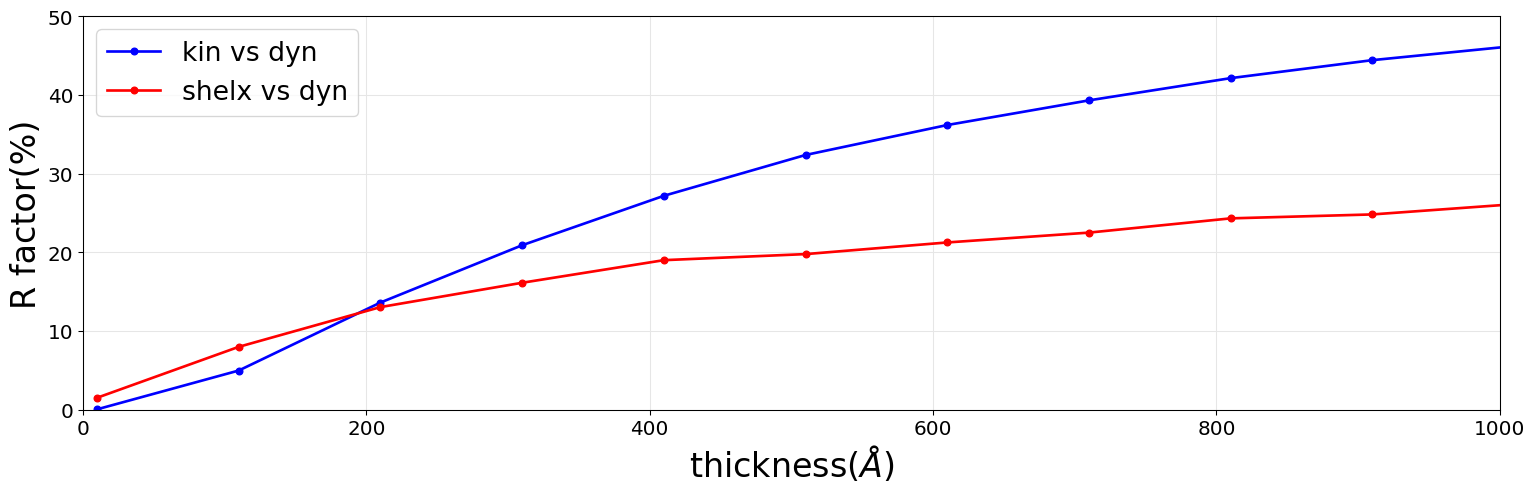

In [313]:
plts =[[thicks,Rfactors       ,'b-o','kin vs dyn']]
plts+=[[thicks,Rfactors_shelxl,'r-o','shelx vs dyn']]
fig,ax = dsp.stddisp(plts,labs=['thickness($\AA$)','R factor(%)'],lw=2,
                     figsize=figs,xylims=[0,1000,0,50])

In [314]:
Rfactors_shelxl[0]

1.52

### compare intensities to structure factors 

In [301]:
df_G = sF.get_small_structure_factor('resources/LTA_no_iso.cif',aniso=False,Nmax=12)
rock=ut.load_pkl('dat/LTA/rocks/Nbeam_Nmax15_Smax001_osc4_npts601/rock_.pkl')
hklf=rock.get_full_refl(Swm=0.0095)
df = pd.DataFrame(index=hklf)
df[['h','k','l']] = np.array([eval(h) for h in hklf])
df['I'] = np.array([rock.Iz_dyn[h][0] for h in hklf])
df['hkl']=df.index

In [302]:
h0 = str((-2,0,2))
df['I'] = df.I*df_G.loc[h0,'I']/df.loc[h0,'I']
dfc=pd.merge(df_G,df,suffixes=('_gemmi','_dyn'),on='hkl')
dfc.index=dfc.hkl


In [303]:
print(dfc.sort_values('I_dyn',ascending=False)[['I_gemmi','I_dyn']].to_string())
# print(dfc.loc[str((-2,0,2)),['I_gemmi','I_dyn']])
# print(df.loc[str((-2,0,2))].I)

                   I_gemmi        I_dyn
hkl                                    
(-2, 0, 2)     1361.037193  1361.037193
(-5, 0, 5)      722.931206   727.869560
(5, 0, -5)      722.931206   727.642486
(3, 0, -3)      548.942183   556.505241
(-3, 0, 3)      548.942183   555.337177
(-4, 0, 4)      502.021997   509.433448
(4, 0, -4)      502.021997   509.127173
(0, 9, -4)      315.997533   319.166514
(0, -9, 4)      315.997533   318.977957
(2, 2, -3)      235.923640   239.095434
(-2, -2, 3)     235.923640   238.584366
(1, 6, -4)      214.645538   216.612637
(5, 4, -7)      212.863639   214.713668
(-7, 4, 5)      212.863639   214.362649
(4, 5, -7)      212.863639   214.102884
(-5, -4, 7)     212.863639   213.385572
(5, 5, -8)      157.089934   158.463558
(-9, 9, 5)      127.366141   128.067427
(-5, -9, 9)     127.366141   127.818259
(5, 9, -9)      127.366141   127.702158
(7, -5, -5)     117.328578   118.782057
(-7, 5, 5)      117.328578   118.620438
(-5, -5, 7)     117.328578   118.543279


### Comparing cif files 

In [205]:
np.array(site.)

array(0.008)

In [252]:
import gemmi

def get_atoms(cif_file,thick=0):
    st = gemmi.read_small_structure(cif_file)
    df_atoms = pd.DataFrame(np.array([
        [site.element.name,site.label,site.element.atomic_number] for site in st.sites]),
        columns=['element','label','Z'])
    df_atoms['thick'] = thick
    df_atoms[['x','y','z']] = np.array([site.fract.wrap_to_unit().tolist() for site in st.sites])
    df_atoms[['a11','a12','a13','a21','a22','a23','a31','a32','a33']] = np.array([np.array(site.aniso.as_mat33()).flatten() for site in st.sites])
    return df_atoms

# thick=110
# get_atoms('dat/shelx/shelxl_lta_sim_%dA.cif' %thick,thick=thick)
df_atoms0 = get_atoms('resources/LTA.cif')
df_atoms = pd.concat([df_atoms0]+[get_atoms('dat/shelx/shelxl_lta_sim_%dA.cif' %t,thick=t) for i,t in enumerate(thicks)])

In [253]:
ai_cols=['a%d%d' %(i+1,j+1) for i,j in np.array([f.flatten() for f in np.meshgrid(*[np.arange(3)]*2)]).T ]
df_label=df_atoms[['x','y','z','label']+ai_cols].groupby('label')#.apply(np.mean)
df_mean = df_label.agg(np.mean)
df_std  = df_label.agg(np.std)
print('\t MEAN : \n',df_mean)
print(df_atoms0)
# print('\t STD  : \n',df_std)

	 MEAN : 
               x         y         z       a11       a21     a31       a12  \
label                                                                       
O002   0.000000  0.718884  0.500000 -0.000973  0.000000  0.0000  0.000000   
O003   0.795067  0.795067  0.500000 -0.014675 -0.008690  0.0000 -0.008690   
O004   0.844027  0.609454  0.390546  0.012759  0.005700 -0.0057  0.005700   
Si01   0.869824  0.683448  0.500000 -0.005108 -0.000598  0.0000 -0.000598   

            a22     a32     a13     a23       a33  
label                                              
O002  -0.016025  0.0000  0.0000  0.0000  0.027000  
O003  -0.014675  0.0000  0.0000  0.0000  0.002235  
O004  -0.011273 -0.0022 -0.0057 -0.0022 -0.011273  
Si01  -0.005345  0.0000  0.0000  0.0000 -0.006143  
  element label   Z  thick         x         y         z    a11    a12    a13  \
0      Si  Si01  14      0  0.869227  0.683510  0.500000  0.005  0.001  0.000   
1       O  O002   8      0  0.000000  0.718913  0.50